In [1]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite, FixedEmbeddingComposite
import networkx as nx
import dwave_networkx as dnx
from hybrid.reference.kerberos import KerberosSampler
import dimod
import neal

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Some tests

In [2]:
# Create a D-Wave sampler instance
sampler = DWaveSampler()

In [3]:
# Using DWave system
sampler = EmbeddingComposite(sampler)
response = sampler.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1})
print(response.data_vectors['energy'])
list(response.data())

[-1.5]


[Sample(sample={'a': -1, 'b': -1}, energy=-1.5, num_occurrences=1, chain_break_fraction=0.0)]

In [4]:
# Using a classical exact solver: calculates the energy of all possible samples
solver = dimod.ExactSolver()
response = solver.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1})
print(response.data_vectors['energy'])
list(response.data())

[-1.5 -0.5 -0.5  2.5]


[Sample(sample={'a': -1, 'b': -1}, energy=-1.5, num_occurrences=1),
 Sample(sample={'a': 1, 'b': -1}, energy=-0.5, num_occurrences=1),
 Sample(sample={'a': 1, 'b': 1}, energy=-0.5, num_occurrences=1),
 Sample(sample={'a': -1, 'b': 1}, energy=2.5, num_occurrences=1)]

In [5]:
# Using a (classically) simulated annealing sampler
solver = neal.SimulatedAnnealingSampler()
response = solver.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1}, num_reads=2)
print(response.data_vectors['energy'])
list(response.data())

[-1.5 -1.5]


[Sample(sample={'a': -1, 'b': -1}, energy=-1.5, num_occurrences=1),
 Sample(sample={'a': -1, 'b': -1}, energy=-1.5, num_occurrences=1)]

In [6]:
# Create an embedding composite with a fixed map
embedding = {'a':[0,4], 'b':[1], 'c':[5]}
embed_sampler = FixedEmbeddingComposite(sampler, embedding)

['bipartite_layout', 'circular_layout', 'kamada_kawai_layout', 'random_layout', 'rescale_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'fruchterman_reingold_layout']


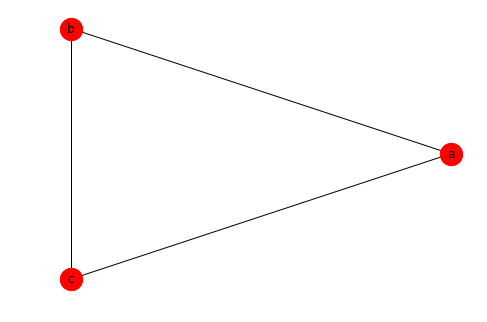

In [18]:
# Plot composite graph
g = nx.Graph()
g.add_nodes_from(embed_sampler.nodelist)
g.add_edges_from(embed_sampler.edgelist)
print(nx.drawing.layout.__all__)
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True, node_size=500)

## Ex 8.a)

Nodes: 25
Edges: 37


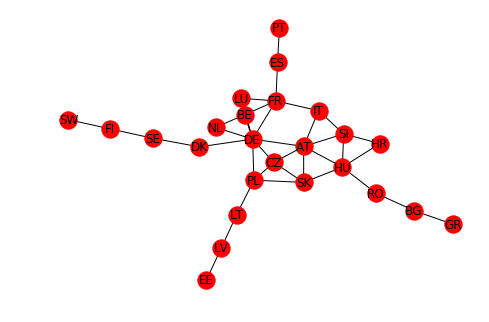

In [57]:
eu_graph = nx.read_adjlist('ps8_Europe.txt', delimiter=',')
nx.draw(eu_graph, pos=nx.kamada_kawai_layout(eu_graph), with_labels=True, node_size=300)
print('Nodes:', eu_graph.number_of_nodes())
print('Edges:', eu_graph.number_of_edges())

In [191]:
sampler = KerberosSampler()
eu_colors = dnx.min_vertex_coloring(eu_graph, sampler, chromatic_ub=4)
print('nº of colors:', len(set(eu_colors.values())))

nº of colors: 4


In [206]:
# Cannot be done with 3 colors
sampler = KerberosSampler()
eu_colors2 = dnx.min_vertex_coloring(eu_graph, sampler, chromatic_ub=3, max_iter=1000, convergence=3)

RuntimeError: something went wrong when calculating the chromatic number bounds

In [192]:
# Checking validity
eu_borders = tuple(eu_graph.edges)
# print(eu_borders)
i = 0
for country1, country2 in eu_borders:
    if eu_colors[country1] == eu_colors[country2]:
        print(country1, 'has same color as', country2, '!')
        i += 1
if i == 0:
    print('Solution is valid!')

Solution is valid!


dict_keys(['AT', 'BE', 'BG', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IT', 'LT', 'LU', 'LV', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'SW']) 

['PT', 'ES', 'FR', 'IT', 'LU', 'BE', 'DE', 'AT', 'SI', 'NL', 'CZ', 'PL', 'DK', 'SE', 'FI', 'SW', 'SK', 'LT', 'LV', 'EE', 'HU', 'HR', 'RO', 'BG', 'GR'] 

{'PT': 0, 'ES': 1, 'FR': 2, 'IT': 0, 'LU': 0, 'BE': 1, 'DE': 3, 'AT': 2, 'SI': 1, 'NL': 0, 'CZ': 1, 'PL': 2, 'DK': 0, 'SE': 1, 'FI': 3, 'SW': 0, 'SK': 3, 'LT': 3, 'LV': 2, 'EE': 3, 'HU': 0, 'HR': 3, 'RO': 3, 'BG': 1, 'GR': 2}


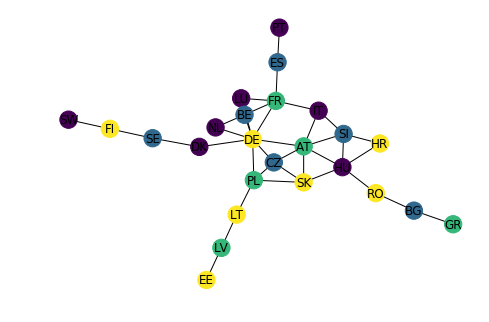

In [193]:
print(eu_colors.keys(), '\n')
print(eu_graph.nodes, '\n')

# Reordering resultant dict by eu_graph.nodes
eu_colors = {key: eu_colors[key] for key in eu_graph.nodes}
print(eu_colors)

nx.draw(eu_graph, pos=nx.kamada_kawai_layout(eu_graph), with_labels=True, node_size=300,
        node_color=list(eu_colors.values()))

Minimum number of colors needed is 4.

## Ex 8.b)

Nodes: 51
Edges: 109


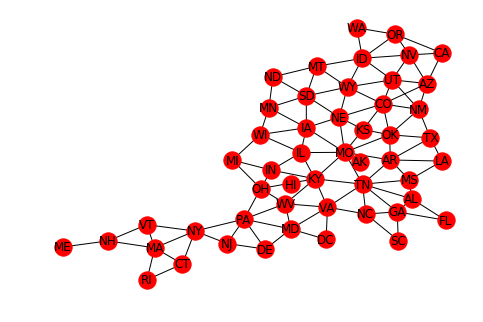

In [225]:
usa_graph = nx.read_adjlist('ps8_USA.txt', delimiter=',')
nx.draw(usa_graph, pos=nx.kamada_kawai_layout(usa_graph), with_labels=True, node_size=300)
print('Nodes:', usa_graph.number_of_nodes())
print('Edges:', usa_graph.number_of_edges())

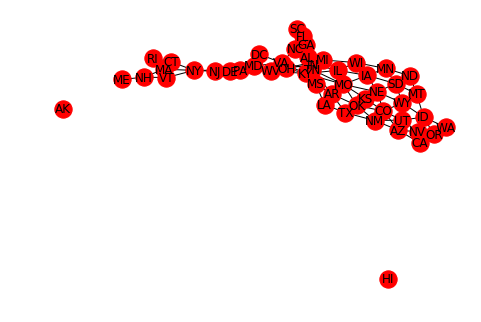

In [195]:
# AK & HI do not show up in Kamada-Kawai layout. No problem, they have no edges.
nx.draw(usa_graph, with_labels=True, node_size=300)

In [247]:
sampler = KerberosSampler()
usa_colors = dnx.min_vertex_coloring(usa_graph, sampler, chromatic_ub=4)
print('nº of colors:', len(set(usa_colors.values())))

nº of colors: 4


In [248]:
# Checking validity
usa_borders = tuple(usa_graph.edges)
# print(usa_borders)

i = 0
for country1, country2 in usa_borders:
    if usa_colors[country1] == usa_colors[country2]:
        print(country1, 'has same color as', country2, '!')
        i += 1
if i == 0:
    print('Solution is valid!')

Solution is valid!


In [278]:
# Cannot be done with 3 colors
sampler = KerberosSampler()
usa_colors2 = dnx.min_vertex_coloring(usa_graph, sampler, chromatic_ub=3, max_iter=100,
                                      convergence=5)

In [279]:
# Checking validity
i = 0
for country1, country2 in usa_borders:
    if usa_colors2[country1] == usa_colors2[country2]:
        print(country1, 'has same color as', country2, '!')
        i += 1
if i == 0:
    print('Solution is valid!')

AZ has same color as UT !


KeyError: 'OH'

`OH` is missing from result due to chromatic upper bound being 3.  
`AZ-UT` & `OH` belong to sections of the graph that require 4 colours.

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']) 

['AK', 'AL', 'MS', 'TN', 'GA', 'FL', 'AR', 'MO', 'LA', 'TX', 'OK', 'AZ', 'CA', 'NV', 'UT', 'CO', 'NM', 'OR', 'WY', 'NE', 'KS', 'CT', 'NY', 'MA', 'RI', 'DC', 'MD', 'VA', 'DE', 'PA', 'NJ', 'NC', 'SC', 'HI', 'IA', 'MN', 'WI', 'IL', 'SD', 'ID', 'MT', 'WA', 'IN', 'KY', 'MI', 'OH', 'WV', 'NH', 'VT', 'ME', 'ND'] 

{'AK': 2, 'AL': 0, 'MS': 2, 'TN': 1, 'GA': 2, 'FL': 1, 'AR': 0, 'MO': 2, 'LA': 1, 'TX': 2, 'OK': 1, 'AZ': 3, 'CA': 2, 'NV': 0, 'UT': 1, 'CO': 2, 'NM': 0, 'OR': 1, 'WY': 0, 'NE': 1, 'KS': 0, 'CT': 0, 'NY': 2, 'MA': 1, 'RI': 2, 'DC': 0, 'MD': 1, 'VA': 2, 'DE': 2, 'PA': 0, 'NJ': 1, 'NC': 0, 'SC': 1, 'HI': 0, 'IA': 0, 'MN': 1, 'WI': 2, 'IL': 1, 'SD': 2, 'ID': 2, 'MT': 1, '

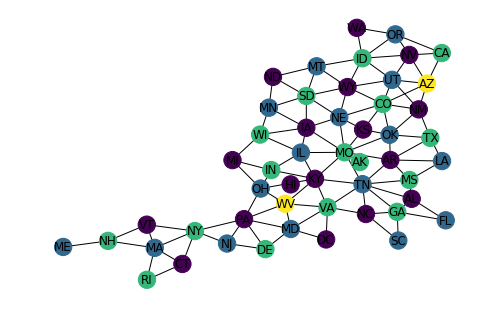

In [249]:
print(usa_colors.keys(), '\n')
print(usa_graph.nodes, '\n')

# Reordering resultant dict by usa_graph.nodes
usa_colors = {key: usa_colors[key] for key in usa_graph.nodes}
print(usa_colors)

nx.draw(usa_graph, pos=nx.kamada_kawai_layout(usa_graph), with_labels=True, node_size=300,
        node_color=list(usa_colors.values()))

Minimum number of colors needed is 4.